### 필요한 라이브러리 임포트, 파일 불러오기

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [3]:
raw_data = pd.read_csv("C:/Users/Owner/Desktop/diversified_ecommerce_dataset.csv")

In [4]:
df = pd.DataFrame(raw_data)
df.head()

,Product ID,Product Name,Category,Price,Discount,Tax Rate,Stock Level,Supplier ID,Customer Age Group,Customer Location,Customer Gender,Shipping Cost,Shipping Method,Return Rate,Seasonality,Popularity Index
0,P6879,Jacket,Apparel,53.85,5,15,150,S535,35-44,"New York, USA",Male,23.32,Standard,4.49,Yes,56
1,P5132,Camera,Electronics,761.26,10,15,224,S583,25-34,"London, UK",Female,20.88,Overnight,16.11,No,79
2,P2941,Sneakers,Footwear,1756.76,5,8,468,S118,25-34,"Tokyo, Japan",Non-Binary,16.43,Standard,4.93,No,40
3,P8545,Cookbooks,Books,295.24,10,15,25,S104,18-24,"Paris, France",Female,27.49,Standard,1.31,No,93
4,P4594,Camera,Electronics,832.00,10,12,340,S331,55+,"Tokyo, Japan",Male,45.93,Overnight,4.37,No,56


### 데이터 이해

In [5]:
## 해당 데이터의 열과 행 확인
df.shape

(1000000, 16)

In [6]:
## 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Product ID          1000000 non-null  object 
 1   Product Name        1000000 non-null  object 
 2   Category            1000000 non-null  object 
 3   Price               1000000 non-null  float64
 4   Discount            1000000 non-null  int64  
 5   Tax Rate            1000000 non-null  int64  
 6   Stock Level         1000000 non-null  int64  
 7   Supplier ID         1000000 non-null  object 
 8   Customer Age Group  1000000 non-null  object 
 9   Customer Location   1000000 non-null  object 
 10  Customer Gender     1000000 non-null  object 
 11  Shipping Cost       1000000 non-null  float64
 12  Shipping Method     1000000 non-null  object 
 13  Return Rate         1000000 non-null  float64
 14  Seasonality         1000000 non-null  object 
 15  Popularity Index

In [7]:
## 기술통계 확인
df.describe()

,Price,Discount,Tax Rate,Stock Level,Shipping Cost,Return Rate,Popularity Index
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,1005.120742,12.516955,10.002052,250.028536,24.985224,10.492896,49.970211
std,574.451223,8.539929,3.406026,144.676275,14.431730,5.484849,29.164875
min,10.000000,0.000000,5.000000,0.000000,0.000000,1.000000,0.000000
25%,507.860000,5.000000,8.000000,125.000000,12.490000,5.740000,25.000000
50%,1005.430000,15.000000,10.000000,250.000000,24.970000,10.480000,50.000000
75%,1502.310000,20.000000,12.000000,375.000000,37.470000,15.250000,75.000000
max,2000.000000,25.000000,15.000000,500.000000,50.000000,20.000000,100.000000


In [8]:
## 결측치 확인
df.isnull().sum()

Product ID            0
Product Name          0
Category              0
Price                 0
Discount              0
Tax Rate              0
Stock Level           0
Supplier ID           0
Customer Age Group    0
Customer Location     0
Customer Gender       0
Shipping Cost         0
Shipping Method       0
Return Rate           0
Seasonality           0
Popularity Index      0
dtype: int64

>데이터 전체에 결측치가 없음. 따로 결측치 처리 하지 않아도 된다.

### 컬럼

Product ID: 각 제품의 고유 ID

Product name: 카탈로그그에 나열된 제품의 이름

category: 제품의 유형(예: 전자제품, 의류, 홈 데코)

price: 제품 가격(USD)

Discount: 제품에 적용된 할인

Tax Rate: 제품에 적용되는 세율

Stock Level: 현재 제품이 남아있는 갯수

supplier ID: 제품 공급업체의 ID

Customer Age Group: 제품을 자주 구매하는 고객 연령대(예: 청소년, 성인, 노인)

Customer Location: 고객의 지리적 위치(예: 국가, 주 또는 도시)

Customer Gender: 고객의 성별(예: 남성, 여성)

Shipping Cost: 제품을 배송하는 비용

Shipping Method: 배송하는데 사용한 방법(예: 스탠다드, 익스프레스, 오버나이트)

Return Rate: 제품의 반품 비율

Seasonality: 제품이 가장 인기 있는 계절(예: 겨울, 여름, 연중)

Popularity Index: 제품의 인기도를 나타낸 점수

> 변수들간의 상관관계를 확인하고, 해당 데이터가 선형인지 비선형인지 확인하기 위해 수치형 데이터와 범주형 데이터를 나누어 산점도를 그린다. 

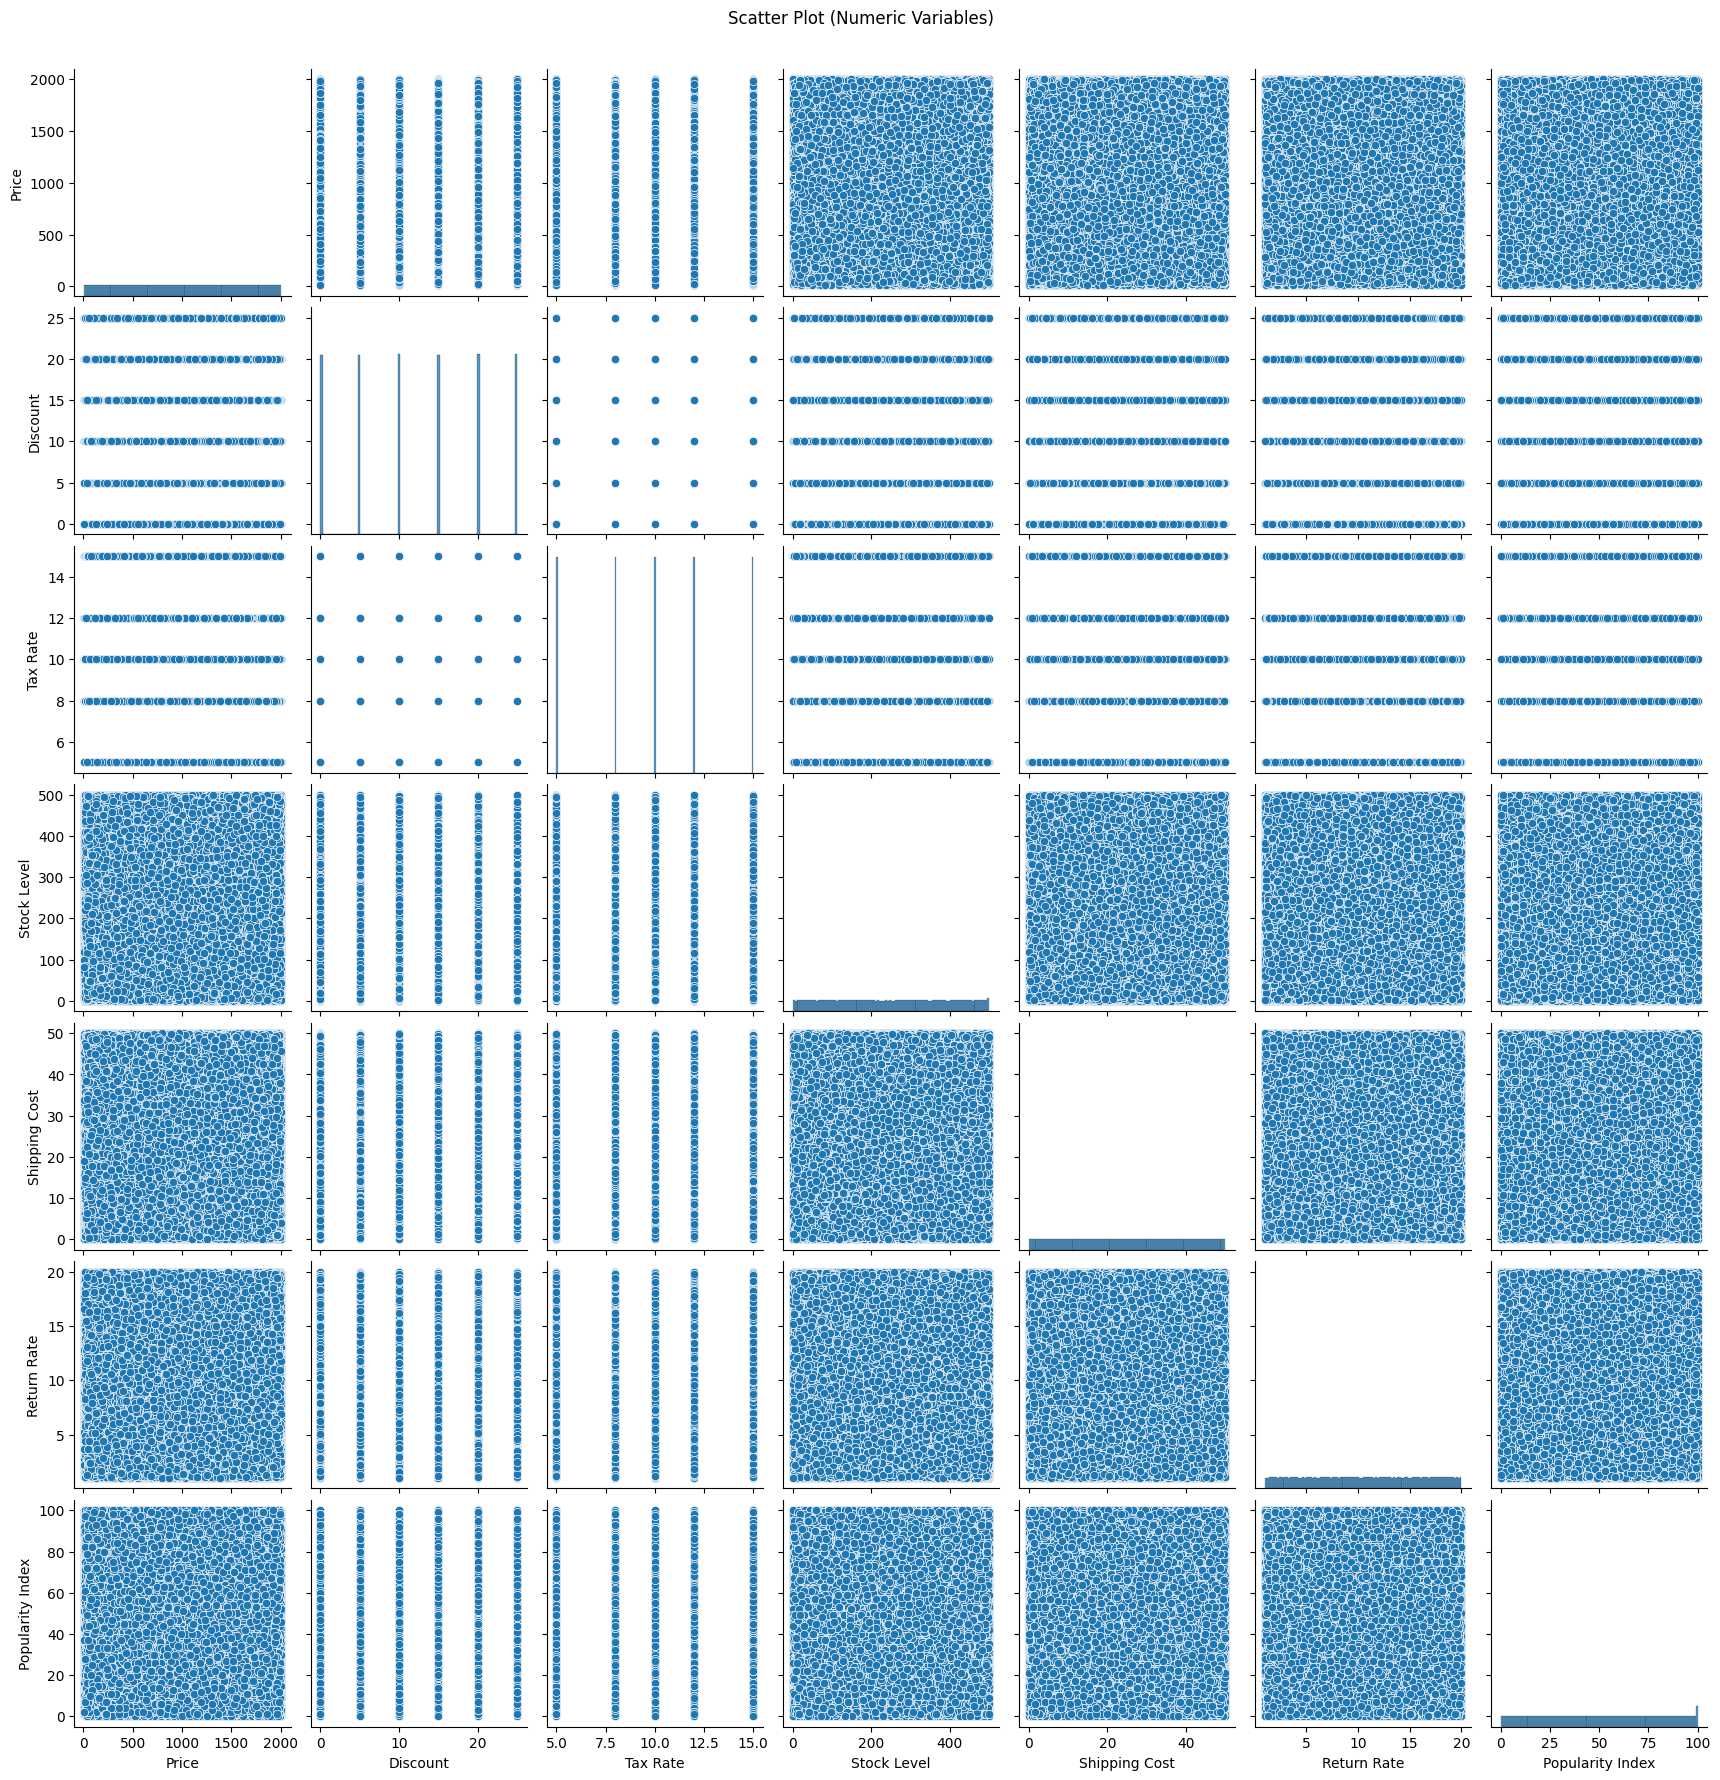

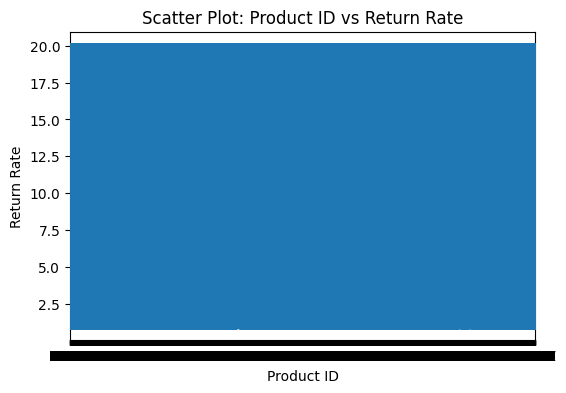

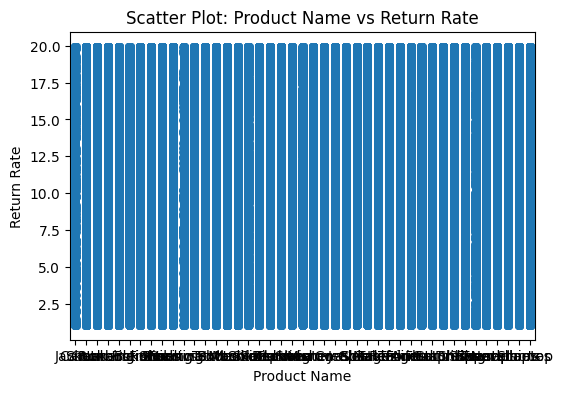

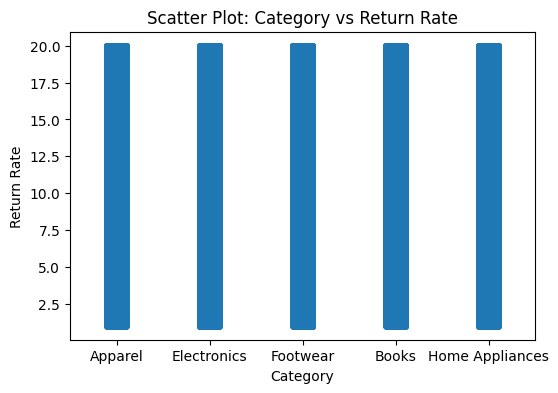

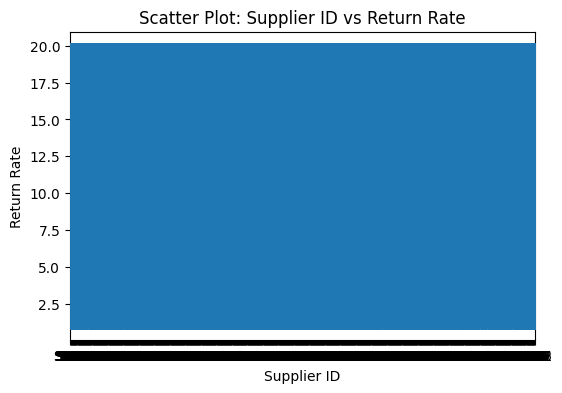

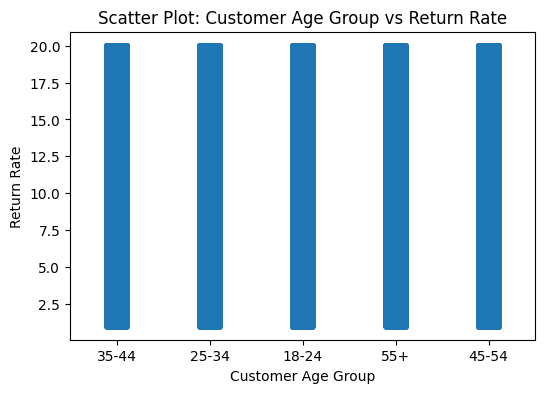

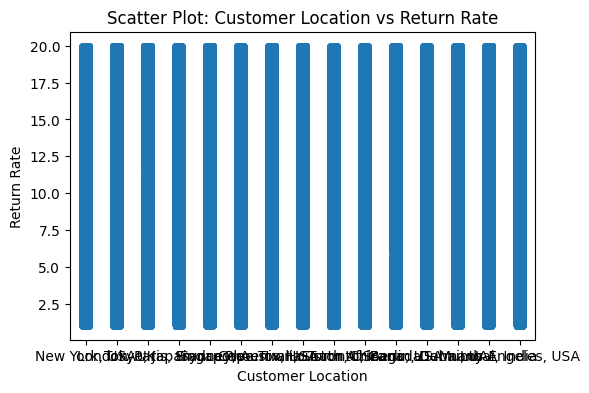

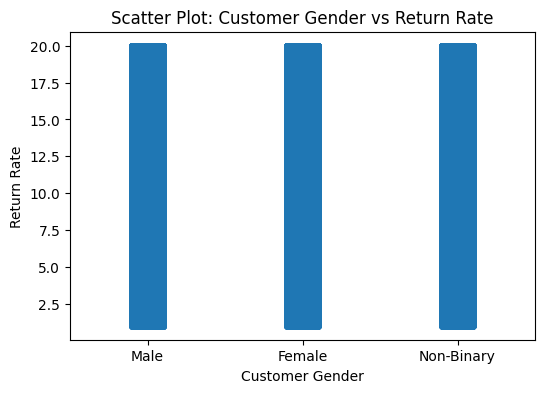

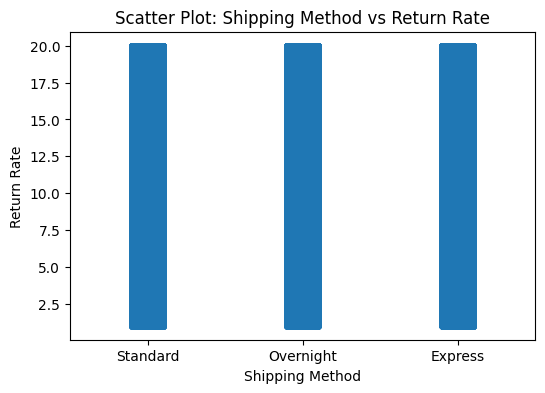

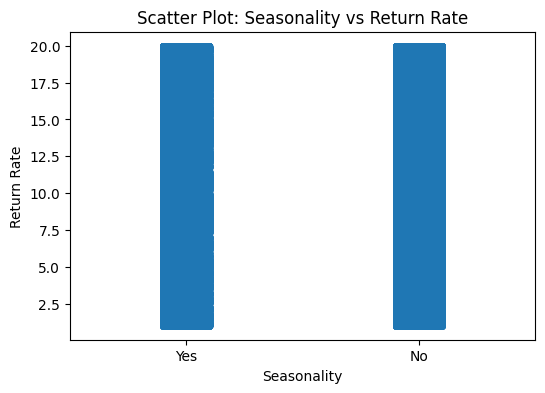

In [9]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(exclude=['int64', 'float64']).columns

# 수치형 변수들 간의 산점도 
sns.pairplot(df[numeric_columns])
plt.suptitle("Scatter Plot (Numeric Variables)", y=1.02)
plt.show()

# 범주형 변수 VS 타겟변숫 산점도
for cat_col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.stripplot(x=df[cat_col], y=df['Return Rate'], jitter=True)
    plt.title(f"Scatter Plot: {cat_col} vs Return Rate")
    plt.show()

> 수치형 변수들의 산점도 그래프를 봤을 때 눈에 띄는 영향력을 가진 특정 변수는 없다고 판단하여 특정 칼럼 제거는 하지 않았다.  
범주형 변수와 타겟 변수인 반품률과의 산점도 그래프에서도 특정 변수가 뚜렷한 상관관계를 보이지 않고, 고르게 분포되어 있다는 것을 확인할 수 있었다. 
  
  >모든 칼럼들이 특별한 상관관계를 나타내지 않아 데이터가 비선형 데이터일 수 있겠다 생각하였다. 

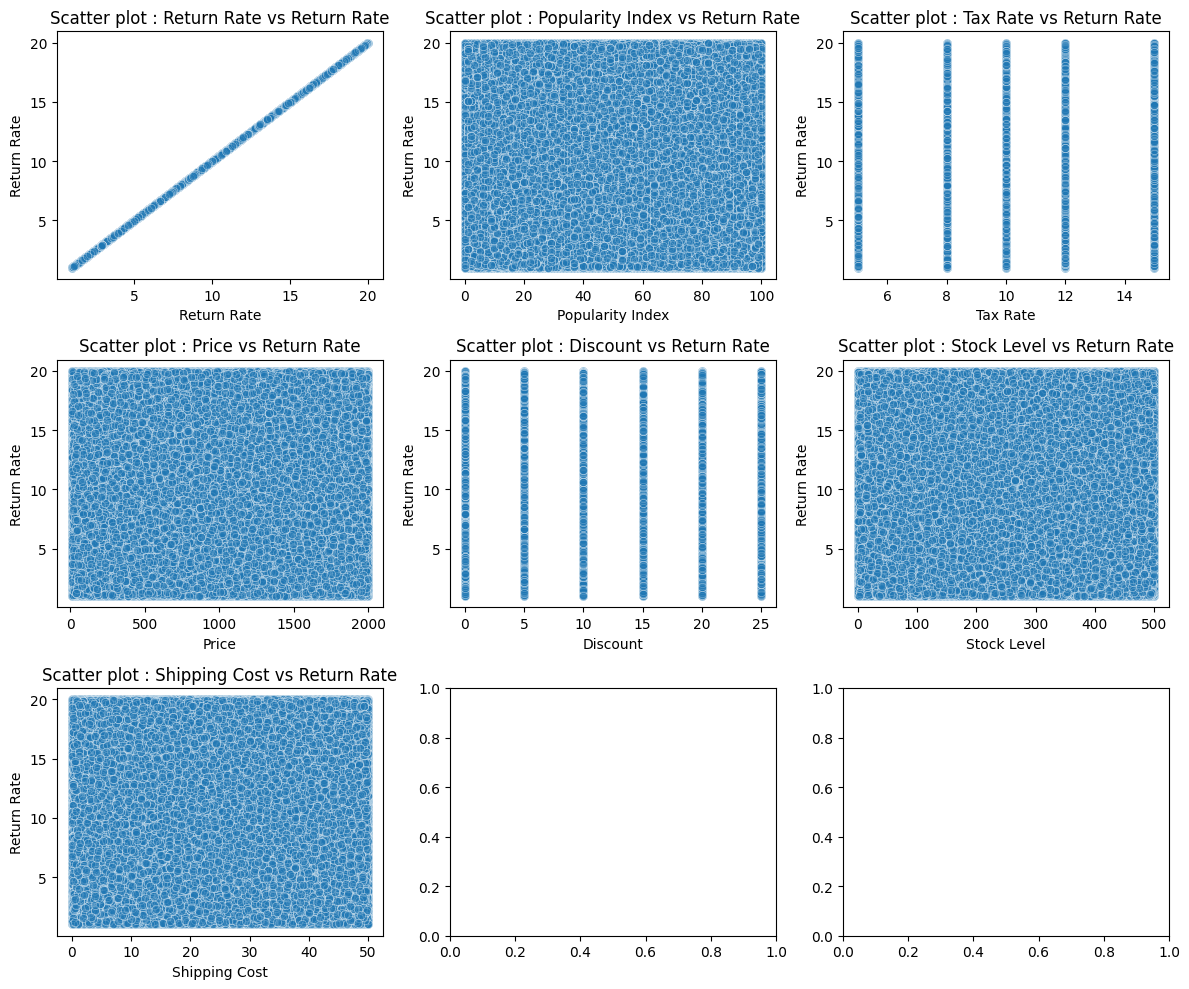

In [10]:
numeric_cols = df.select_dtypes(include=['number']).columns

correlation_matrix = df[numeric_cols].corr()
key_features = correlation_matrix['Return Rate'].abs().sort_values(ascending=False).index[:]

fig, axes = plt.subplots(3, 3, figsize=(12, 10))
axes = axes.flatten()

for i, feature in enumerate(key_features):
    sns.scatterplot(x=df[feature], y=df['Return Rate'], alpha=0.5, ax=axes[i])
    axes[i].set_title(f"Scatter plot : {feature} vs Return Rate")

plt.tight_layout()
plt.show()

> 수치형 변수와 타겟변수의 산점도를 보아도, 어떠한 상관관계를 확인할 수 없다. 

### 이상치 확인

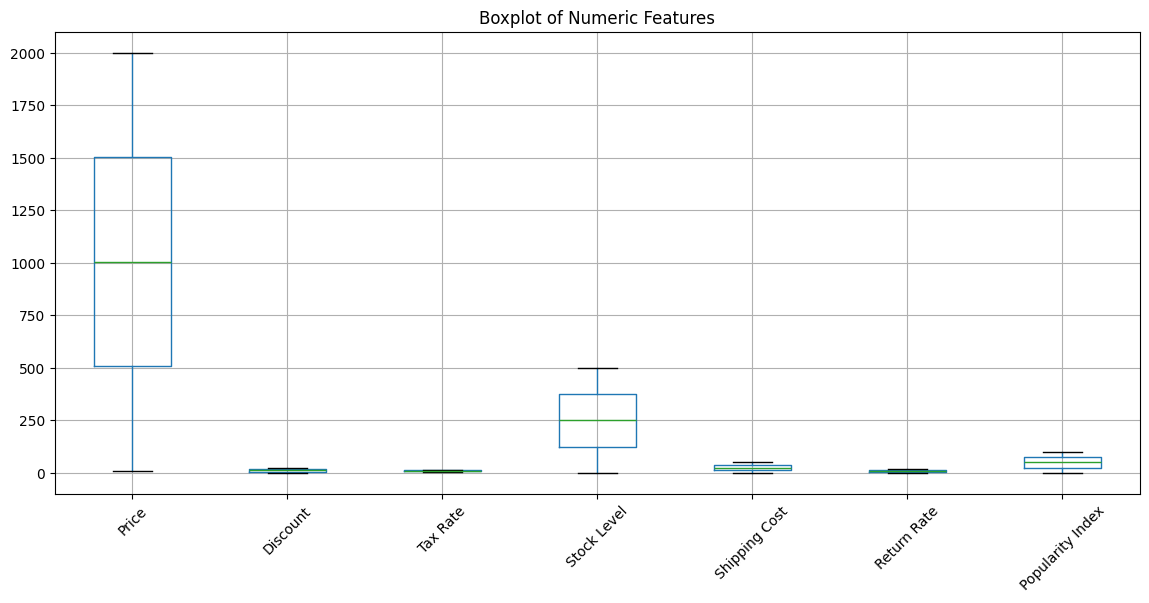

In [11]:
plt.figure(figsize=(len(numeric_cols) * 2, 6))
df[numeric_cols].boxplot(rot=45)  # X축 라벨 회전
plt.title("Boxplot of Numeric Features")
plt.show()

> 이상치 확인을 위해 박스플롯을 그렸으나 박스플롯 범위 이외에 찍히는 점이 없는 것을 보아, 이상치가 없음을 알 수 있다.

In [12]:
# 카테고리형 변수 목록
categorical_columns = [ 'Category',
                       'Customer Age Group', 'Customer Location', 'Customer Gender',
                       'Shipping Method', 'Seasonality']

# 각 컬럼의 고유값 출력
print("\n카테고리형 변수의 고유값:")
for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"{col}: {unique_values}")


카테고리형 변수의 고유값:
Category: ['Apparel' 'Electronics' 'Footwear' 'Books' 'Home Appliances']
Customer Age Group: ['35-44' '25-34' '18-24' '55+' '45-54']
Customer Location: ['New York, USA' 'London, UK' 'Tokyo, Japan' 'Paris, France' 'Singapore'
 'Sydney, Australia' 'Phoenix, USA' 'Cape Town, South Africa'
 'Houston, USA' 'Toronto, Canada' 'Chicago, USA' 'Berlin, Germany'
 'Dubai, UAE' 'Mumbai, India' 'Los Angeles, USA']
Customer Gender: ['Male' 'Female' 'Non-Binary']
Shipping Method: ['Standard' 'Overnight' 'Express']
Seasonality: ['Yes' 'No']


In [13]:


# 1. 라벨 인코딩: 여러 컬럼
le_category = LabelEncoder()
df['Category (Label Encoded)'] = le_category.fit_transform(df['Category'])

le_location = LabelEncoder()
df['Customer Location (Label Encoded)'] = le_location.fit_transform(df['Customer Location']) 

le_shipping = LabelEncoder()
df['Shipping Method (Label Encoded)'] = le_shipping.fit_transform(df['Shipping Method'])

le_seasonality = LabelEncoder()
df['Seasonality (Label Encoded)'] = le_seasonality.fit_transform(df['Seasonality'])

le_age_group = LabelEncoder()
df['Customer Age Group (Label Encoded)'] = le_age_group.fit_transform(df['Customer Age Group'])

# 2. 이진 인코딩: Customer Gender
if 'Customer Gender' in df.columns:  # 컬럼 존재 여부 확인
    binary_encoder = ce.BinaryEncoder(cols=['Customer Gender'])
    df = binary_encoder.fit_transform(df)
else:
    print("Customer Gender column is missing or already encoded.")

> 상품의 고유 번호, 공급자 아이디, 상품의 이름은 반품률을 예측하는데 불필요하다 판단하여 해당 칼럼은 drop하기로 결정했다. 

In [14]:
df = df.drop(columns=['Product ID']) 
df = df.drop(columns=['Supplier ID'])
df = df.drop(columns=['Product Name'])

# 원래 문자열 컬럼 삭제
df = df.drop(columns=['Category', 'Customer Age Group', 'Customer Location', 'Shipping Method', 'Seasonality'])

#### 인코딩 완료 데이터의 타입 확인

In [15]:
print(df.dtypes)

Price                                 float64
Discount                                int64
Tax Rate                                int64
Stock Level                             int64
Customer Gender_0                       int64
Customer Gender_1                       int64
Shipping Cost                         float64
Return Rate                           float64
Popularity Index                        int64
Category (Label Encoded)                int64
Customer Location (Label Encoded)       int64
Shipping Method (Label Encoded)         int64
Seasonality (Label Encoded)             int64
Customer Age Group (Label Encoded)      int64
dtype: object


> 모두 수치형으로 바뀌었으니 머신러닝 학습을 위한 준비 완료.

In [23]:
## 상관계수 확인

correlation_matrix = df.corr()
return_corr = correlation_matrix['Return Rate'].sort_values(ascending=False)
print(return_corr)

KeyError: 'Return Rate'

> 산점도에서도 비선형 데이터일 것이라 짐작했지만 해당 상관계수 결과를 보고 비선형 데이터이라고 판단하여 비선형 모델링 기법을 적용하기로 결정하였다.

In [17]:


def scale_columns(df, columns_to_scale, scaler_type='standard'):
    if scaler_type == 'standard':
        scaler = StandardScaler()
    elif scaler_type == 'minmax':
        scaler = MinMaxScaler()
    else:
        raise ValueError("Unsupported scaler_type. Use 'standard' or 'minmax'.")

    scaled_data = scaler.fit_transform(df[columns_to_scale])
    scaled_df = pd.DataFrame(scaled_data, columns=[f"{col}_{scaler_type}_scaled" for col in columns_to_scale])
    df = df.drop(columns=columns_to_scale)  # 기존 컬럼 삭제
    df = pd.concat([df, scaled_df], axis=1)
    return df

    # 스케일링 적용
columns_standard = ['Price', 'Stock Level', 'Discount', 'Tax Rate', 'Shipping Cost', 'Return Rate']
# columns_minmax = ['Discount', 'Tax Rate', 'Shipping Cost', 'Return Rate']
df = scale_columns(df, columns_standard, scaler_type='standard')
#df = scale_columns(df, columns_minmax, scaler_type='minmax')

# 스케일링 결과 확인
print("\n스케일링 결과 데이터프레임:")
print(df.head())


스케일링 결과 데이터프레임:
   Customer Gender_0  Customer Gender_1  Popularity Index  \
0                  0                  1                56   
1                  1                  0                79   
2                  1                  1                40   
3                  1                  0                93   
4                  0                  1                56   

   Category (Label Encoded)  Customer Location (Label Encoded)  \
0                         0                                  8   
1                         2                                  5   
2                         3                                 13   
3                         1                                  9   
4                         2                                 13   

   Shipping Method (Label Encoded)  Seasonality (Label Encoded)  \
0                                2                            1   
1                                1                            0   
2                 

#### 타겟 데이터와 X 생성

In [18]:
X = df.drop(columns=['Return Rate_standard_scaled'])
y = df['Return Rate_standard_scaled']

In [19]:
df.describe()

,Customer Gender_0,Customer Gender_1,Popularity Index,Category (Label Encoded),Customer Location (Label Encoded),Shipping Method (Label Encoded),Seasonality (Label Encoded),Customer Age Group (Label Encoded),Price_standard_scaled,Stock Level_standard_scaled,Discount_standard_scaled,Tax Rate_standard_scaled,Shipping Cost_standard_scaled,Return Rate_standard_scaled
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
mean,0.666209,0.667332,49.970211,2.000312,6.993005,1.000176,0.499797,1.997592,-5.604051e-17,-1.770140e-17,1.027303e-16,-2.169305e-16,-4.065299e-16,-9.854801e-16
std,0.471566,0.471169,29.164875,1.412996,4.319397,0.816533,0.500000,1.413840,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.732299e+00,-1.728194e+00,-1.465699e+00,-1.468590e+00,-1.731271e+00,-1.730750e+00
25%,0.000000,0.000000,25.000000,1.000000,3.000000,0.000000,0.000000,1.000000,-8.656279e-01,-8.641956e-01,-8.802133e-01,-5.877973e-01,-8.658165e-01,-8.665504e-01
50%,1.000000,1.000000,50.000000,2.000000,7.000000,1.000000,0.000000,2.000000,5.383541e-04,-1.972405e-04,2.907573e-01,-6.024619e-04,-1.054898e-03,-2.351256e-03
75%,1.000000,1.000000,75.000000,3.000000,11.000000,2.000000,1.000000,3.000000,8.655034e-01,8.638011e-01,8.762425e-01,5.865924e-01,8.650926e-01,8.673175e-01
max,1.000000,1.000000,100.000000,4.000000,14.000000,2.000000,1.000000,4.000000,1.731879e+00,1.727799e+00,1.461728e+00,1.467385e+00,1.733319e+00,1.733340e+00


In [20]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100,  max_depth=5, random_state=42)

rf_model.fit(X_train, y_train)

# 예측 및 평가
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"📌RF MSE: {mse}")
print(f"RF RMSE: {rmse}")
print(f"RF r2: \n {r2:.4f}")


📌RF MSE: 0.9978160253111401
RF RMSE: 0.9989074157854371
RF r2: 
 -0.0000


In [21]:
# 하이퍼파라미터 후보 설정
param_grid = {
    'n_estimators': [50, 100, 200],  # 트리 개수
    'max_depth': [5, 10, 15],  # 트리 최대 깊이
    'min_samples_split': [2, 5, 10],  # 노드 분할 최소 샘플 수
    'min_samples_leaf': [1, 2, 5]  # 리프 노드의 최소 샘플 수
}

# 모델 생성
rf = RandomForestRegressor(random_state=42)

# GridSearchCV 설정 (교차검증 3-Fold)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, scoring='r2', verbose=2)

# 학습 수행
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print(f"📌 최적 하이퍼파라미터: {grid_search.best_params_}")
print(f"📌 최고 R² 점수: {grid_search.best_score_:.4f}")


Fitting 2 folds for each of 81 candidates, totalling 162 fits


c:\Users\Owner\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2892: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


📌 최적 하이퍼파라미터: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
📌 최고 R² 점수: -0.0001


> 최적화된 하이퍼파라미터를 적용하여 다시 모델을 학습시키고 모델 성능을 평가한다.

In [22]:
rf_model_2 = RandomForestRegressor(n_estimators=200,  max_depth=5, min_samples_leaf= 2, min_samples_split= 5, random_state=42)

rf_model_2.fit(X_train, y_train)

# 예측 및 평가
y_pred = rf_model_2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"📌최적화 파라미터 적용 RF MSE: {mse}")
print(f"최적화 파라미터 적용 RF RMSE: {rmse}")
print(f"최적화 파라미터 적용 RF r2: \n {r2:.4f}")

📌최적화 파라미터 적용 RF MSE: 0.9978154407631602
최적화 파라미터 적용 RF RMSE: 0.998907123191721
최적화 파라미터 적용 RF r2: 
 -0.0000
